Genetik Algoritma Başlıyor...

--- Optimizasyon Tamamlandı ---
Bulunan En İyi Çözüm:
CPU Çekirdeği (x1): 12
RAM Miktarı (x2): 18 GB
Maksimum Performans Skoru: 106.8000
Kısıtlar Sağlanıyor mu?: Evet


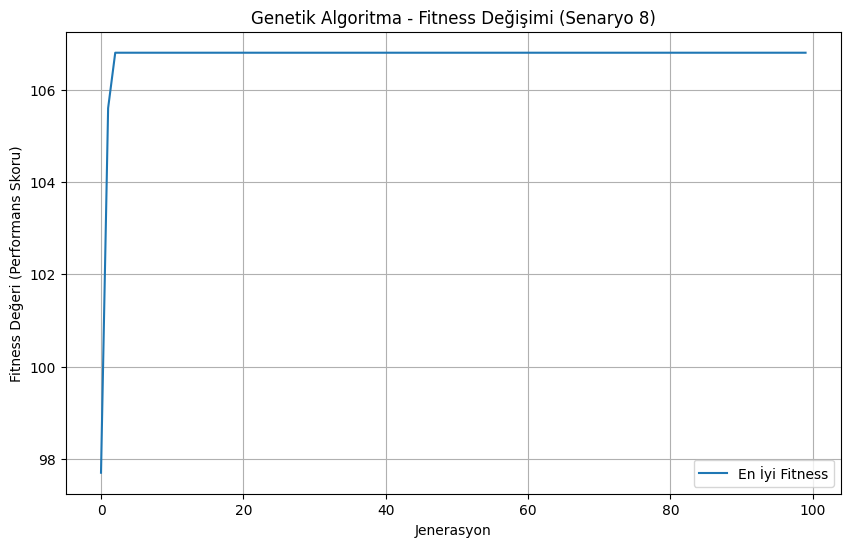

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- 1. PARAMETRELER VE SINIRLAR ---
# Değerlendirme Kriteri: Parametrelerin dinamikliği ve doğru tanımlanması

POPULATION_SIZE = 50   # Popülasyon büyüklüğü
GENERATIONS = 100      # Jenerasyon sayısı
MUTATION_RATE = 0.1    # Mutasyon oranı
CROSSOVER_RATE = 0.8   # Çaprazlama oranı

# Değişken Sınırları (Boundaries)
# x1: CPU [2, 12], x2: RAM [4, 64]
BOUNDS = [
    (2, 12), # x1 alt ve üst limit
    (4, 64)  # x2 alt ve üst limit
]

# --- 2. FONKSİYONLAR ---

def objective_function(x1, x2):
    """
    Senaryo 8 Amaç Fonksiyonu:
    y = 5x1 + 7x2 - 0.1x1^2 - 0.2x2^2
    """
    return 5*x1 + 7*x2 - 0.1*(x1**2) - 0.2*(x2**2)

def check_constraints(x1, x2):
    # Senaryodaki özel kısıtlar
    if (x1 * x2 > 512):
        return False
    if (x1 < 4):
        return False
    return True

def calculate_fitness(individual):
    """
    Bireyin uygunluk değerini hesaplar.
    Eğer kısıtları sağlamıyorsa çok düşük bir ceza puanı verir (Penalty Method).
    """
    x1 = individual[0]
    x2 = individual[1]

    # Sınırların (Boundaries) içinde mi? (Genellikle mutasyonda aşılabilir, kontrol şart)
    if not (BOUNDS[0][0] <= x1 <= BOUNDS[0][1]) or not (BOUNDS[1][0] <= x2 <= BOUNDS[1][1]):
        return -9999 # Sınır dışı cezası

    # Senaryo kısıtlarını sağlıyor mu?
    if check_constraints(x1, x2):
        return objective_function(x1, x2)
    else:
        return -9999 # Kısıt ihlali cezası

def create_individual():
    """Rastgele bir birey (kromozom) oluşturur."""
    # Tam sayı (integer) tabanlı bir problem olduğu için randint kullanıyoruz.
    # Senaryo mantığı gereği CPU ve RAM genelde tam sayı olur.
    x1 = random.randint(BOUNDS[0][0], BOUNDS[0][1])
    x2 = random.randint(BOUNDS[1][0], BOUNDS[1][1])
    return [x1, x2]

def create_population(size):
    """Başlangıç popülasyonunu oluşturur."""
    return [create_individual() for _ in range(size)]

def selection(population, fitness_scores):
    """
    Turnuva Seçimi (Tournament Selection).
    Rastgele k birey seçilir, en iyisi kazanır.
    """
    tournament_size = 3
    selected = []
    for _ in range(len(population)):
        candidates_indices = random.sample(range(len(population)), tournament_size)
        candidates = [population[i] for i in candidates_indices]
        candidates_fitness = [fitness_scores[i] for i in candidates_indices]

        # En yüksek fitness'a sahip olanı seç (Maksimizasyon problemi)
        winner_index = candidates_indices[candidates_fitness.index(max(candidates_fitness))]
        selected.append(population[winner_index])
    return selected

def crossover(parent1, parent2):
    """
    Tek Noktalı Çaprazlama (Single Point Crossover).
    """
    if random.random() < CROSSOVER_RATE:
        point = random.randint(1, len(parent1)-1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1, parent2

def mutation(individual):
    """
    Mutasyon işlemi. Rastgele gen değiştirme.
    """
    if random.random() < MUTATION_RATE:
        gene_index = random.randint(0, 1) # x1 veya x2'yi değiştir
        # Yeni değer ata (sınırlar içinde)
        new_val = random.randint(BOUNDS[gene_index][0], BOUNDS[gene_index][1])
        individual[gene_index] = new_val
    return individual

# --- 3. GENETİK ALGORİTMA DÖNGÜSÜ ---
# Değerlendirme Kriteri: Algoritma akışı doğru kurulmuş mu?

population = create_population(POPULATION_SIZE)
best_fitness_history = []
best_solution = None
best_fitness = -float('inf')

print("Genetik Algoritma Başlıyor...")

for generation in range(GENERATIONS):
    # 1. Fitness Hesaplama
    fitness_scores = [calculate_fitness(ind) for ind in population]

    # En iyi çözümü takip et
    current_max_fitness = max(fitness_scores)
    if current_max_fitness > best_fitness:
        best_fitness = current_max_fitness
        best_solution = population[fitness_scores.index(current_max_fitness)]

    best_fitness_history.append(current_max_fitness)

    # 2. Seçilim (Selection)
    parents = selection(population, fitness_scores)

    # 3. Çaprazlama ve Mutasyon (Yeni Nesil Oluşturma)
    next_generation = []
    for i in range(0, len(parents), 2):
        p1 = parents[i]
        # Tek sayıda parent kalırsa hata almamak için kontrol
        p2 = parents[i+1] if i+1 < len(parents) else parents[0]

        c1, c2 = crossover(p1, p2)

        c1 = mutation(c1)
        c2 = mutation(c2)

        next_generation.extend([c1, c2])

    # Popülasyonu güncelle (Eğer sayı tutmazsa kırpma yapılabilir)
    population = next_generation[:POPULATION_SIZE]

# --- 4. SONUÇLAR VE GÖRSELLEŞTİRME ---
# Değerlendirme Kriteri: Grafikler ve yorumlar

print(f"\n--- Optimizasyon Tamamlandı ---")
print(f"Bulunan En İyi Çözüm:")
print(f"CPU Çekirdeği (x1): {best_solution[0]}")
print(f"RAM Miktarı (x2): {best_solution[1]} GB")
print(f"Maksimum Performans Skoru: {best_fitness:.4f}")

# Kontrol: Kısıtlar sağlanıyor mu?
is_valid = check_constraints(best_solution[0], best_solution[1])
print(f"Kısıtlar Sağlanıyor mu?: {'Evet' if is_valid else 'Hayır'}")

# Grafik Çizimi
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, label='En İyi Fitness')
plt.title('Genetik Algoritma - Fitness Değişimi (Senaryo 8)')
plt.xlabel('Jenerasyon')
plt.ylabel('Fitness Değeri (Performans Skoru)')
plt.legend()
plt.grid(True)
plt.show()